In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
NUM_CLASSES = 3

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [6]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [23]:
# Data preprocessing pipeline
preprocessing_pipeline = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE[0], IMG_SIZE[1]),
    layers.experimental.preprocessing.Rescaling(1.0/255),
      # Adding data augmentation here
])


In [24]:
# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./../Dataset",
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 14946 files belonging to 3 classes.


In [25]:
dataset = dataset.map(lambda x, y: (preprocessing_pipeline(x), y))

In [26]:
# Build your custom model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))


In [27]:
from tensorflow.keras import layers, models, optimizers

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',  # Assuming your labels are integers
              metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(
    dataset,
    epochs=5
)

Epoch 1/5
468/468 [==============================] - 1566s 3s/step - loss: 0.2114 - accuracy: 0.9449
Epoch 2/5
468/468 [==============================] - 1465s 3s/step - loss: 0.0835 - accuracy: 0.9710
Epoch 3/5
468/468 [==============================] - 1433s 3s/step - loss: 0.0757 - accuracy: 0.9744
Epoch 4/5
468/468 [==============================] - 1615s 3s/step - loss: 0.0681 - accuracy: 0.9759
Epoch 5/5
468/468 [==============================] - 3059s 7s/step - loss: 0.0575 - accuracy: 0.9800


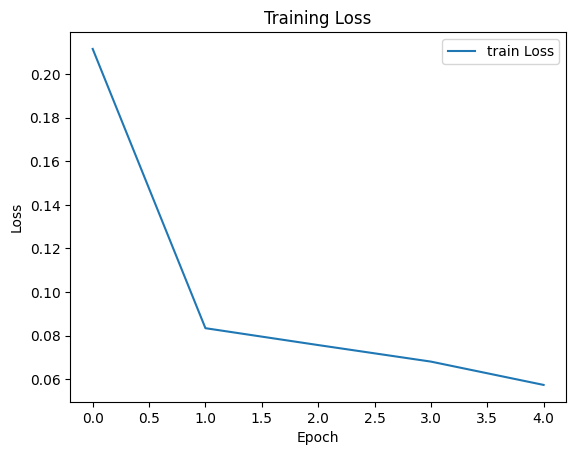

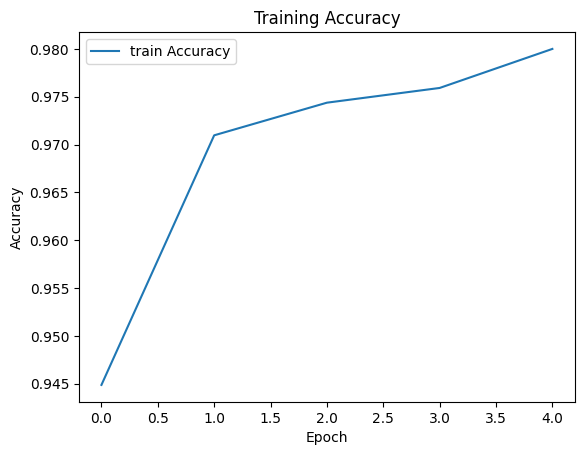

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train Loss')
# plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('./../Image/loss_plot_model3.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
# plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.savefig('./../Image/accuracy_plot_model3.png')
plt.show()